In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Stability Guard for Windows environments
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# The file you saved as healthcare_data.csv contains Medicare inpatient data
data_path = os.path.join('..', 'datasets', 'healthcare_data.csv')

try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Ensure the file is named healthcare_data.csv in the datasets folder.")

Dataset loaded successfully!


In [7]:
# 1. Standard Null Check (0 means the column is full/perfect)
print("Missing values per column (0 is perfect):")
print(df.isnull().sum())

# 2. Check for hidden empty strings or whitespace
# This converts empty spaces to NaN so they show up in the null count
import numpy as np
df_check = df.replace(r'^\s*$', np.nan, regex=True)

print("\nHidden Null Check (Empty strings):")
print(df_check.isnull().sum())

# 3. See the actual data to verify
print("\nFirst 5 rows of data:")
print(df.head())

Missing values per column (0 is perfect):
Patient_ID            0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
Satisfaction          0
dtype: int64

Hidden Null Check (Empty strings):
Patient_ID            0
Age                   0
Gender                0
Blood_Type            0
Medical_Condition     0
Date_of_Admission     0
Doctor                0
Hospital              0
Insurance_Provider    0
Billing_Amount        0
Room_Number           0
Admission_Type        0
Discharge_Date        0
Medication            0
Test_Results          0
Satisfaction          0
dtype: int64

First 5 rows of data:
   Patient_ID  Age  Gender Blood_Type Medical_Condition Date_of_Admission  \
0        1001   52  Female  

In [8]:
# 1. Clean column names to remove any hidden spaces
df.columns = df.columns.str.strip()

# 2. Check for the correct column names and calculate
try:
    # Calculate total discharges
    total_discharges = df['Total Discharges'].sum()
    print(f"Total Discharges: {total_discharges:,}")

    # Calculate average payment
    avg_payment = df['Average Total Payments'].mean()
    print(f"Average Total Payment: ${avg_payment:,.2f}")

    # Find highest volume procedure
    # We use 'DRG Definition' which is the standard column for procedure names
    highest_volume = df.loc[df['Total Discharges'].idxmax()]
    print(f"Highest Volume Procedure: {highest_volume['DRG Definition']}")
    
except KeyError as e:
    print(f" Column Name Error: {e}")
    print("Available columns in your file are:", df.columns.tolist())

 Column Name Error: 'Total Discharges'
Available columns in your file are: ['Patient_ID', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition', 'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider', 'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date', 'Medication', 'Test_Results', 'Satisfaction']


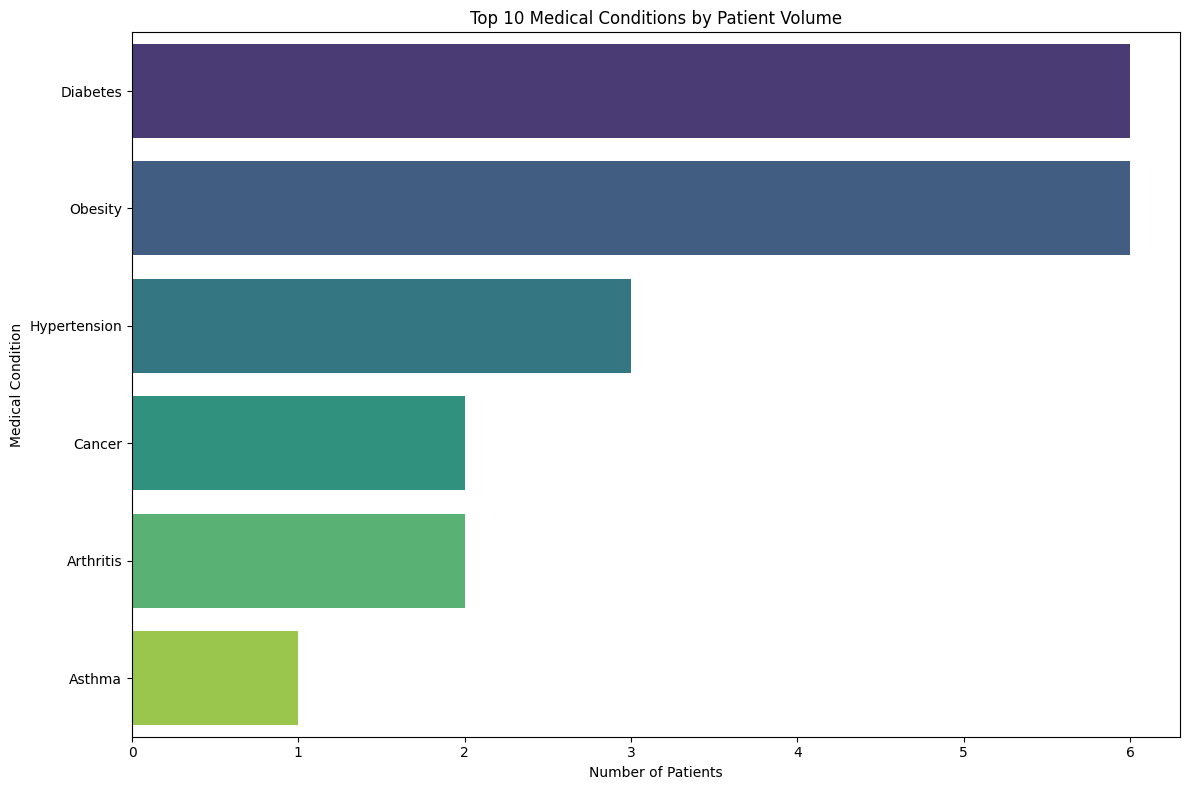

In [9]:
# 1. Clean columns
df.columns = df.columns.str.strip()

# 2. Count the occurrences of each Medical Condition
condition_counts = df['Medical_Condition'].value_counts().reset_index()
condition_counts.columns = ['Medical_Condition', 'Count']
top_10 = condition_counts.head(10)

plt.figure(figsize=(12, 8))
# 3. Create the Bar Plot
sns.barplot(data=top_10, x='Count', y='Medical_Condition', hue='Medical_Condition', palette='viridis', legend=False)

plt.title('Top 10 Medical Conditions by Patient Volume')
plt.xlabel('Number of Patients')
plt.ylabel('Medical Condition')

# 4. Path Management
viz_path = '../visualizations'
os.makedirs(viz_path, exist_ok=True)

# 5. Save and Show
plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'healthcare_top_conditions.png'))
plt.show()

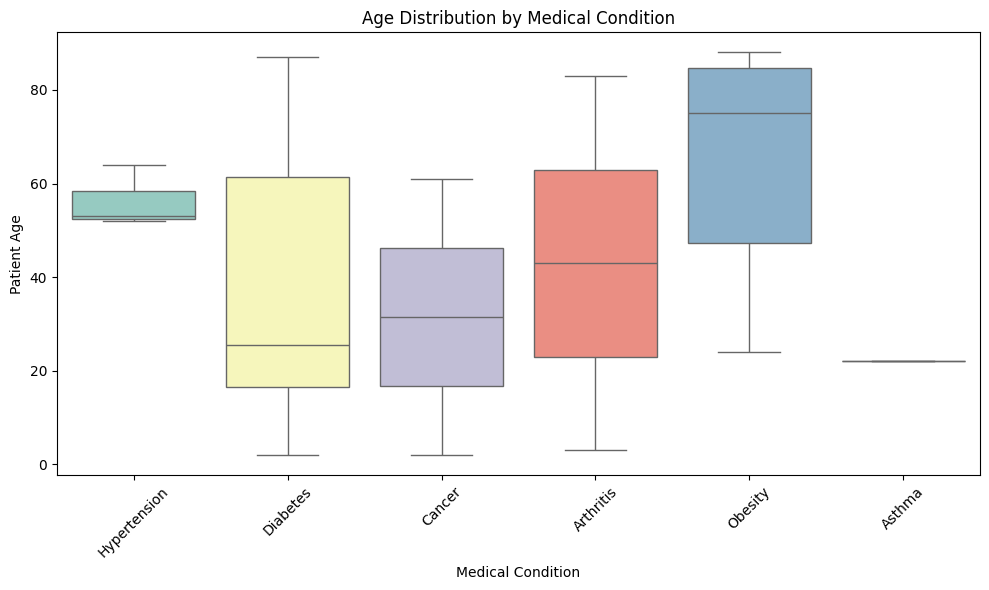

In [6]:
plt.figure(figsize=(10, 6))

# Analyzing age distribution across different medical conditions
sns.boxplot(data=df, x='Medical_Condition', y='Age', hue='Medical_Condition', palette='Set3', legend=False)

plt.title('Age Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Patient Age')
plt.xticks(rotation=45)

# Save to your verified viz_path
plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'age_distribution_by_condition.png'))
plt.show()